In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis,zscore,norm
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CW_Dataset_4100263.csv");

In [ ]:
df = pd.DataFrame(df)
df.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,105.902,81.162,6.864,3.160000,74.83,885.653120,918.2,107.3,104.300000,147.0,923.9,8.83,18.71,1.0
1,106.237,81.402,6.864,3.193873,74.81,920.022259,895.3,113.9,106.505136,146.0,920.2,8.85,18.73,1.0
2,105.910,81.234,6.240,3.400000,75.72,890.700000,909.4,113.6,102.800000,145.5,886.5,8.77,18.80,3.0
3,106.237,81.027,6.864,3.185466,74.83,879.625370,904.0,120.5,106.484904,145.9,933.1,8.84,18.76,1.0
4,106.130,81.493,6.188,2.860000,75.65,906.000000,921.2,114.5,105.700000,145.1,904.8,8.98,18.59,4.0


**DATA UNDERSTANDING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs - Specific back

In [ ]:
# show statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Melt temperature,1000.0,106.938319,5.637329,90.340,105.916,106.086000,106.252000,155.032
Mold temperature,1000.0,81.325338,0.425915,78.872,81.120,81.325000,81.446000,82.145
time_to_fill,1000.0,7.449000,1.694775,6.084,6.292,6.968000,7.124000,11.232
ZDx - Plasticizing time,1000.0,3.229451,0.324164,2.780,2.990,3.193914,3.290000,5.940
ZUx - Cycle time,1000.0,75.232390,0.434617,74.790,74.820,74.830000,75.660000,75.790
SKx - Closing force,1000.0,902.060764,11.095813,876.700,893.500,902.200000,909.250000,930.600
SKs - Clamping force peak value,1000.0,919.313640,10.734404,895.200,914.400,918.600000,926.300000,946.500
Ms - Torque peak value current cycle,1000.0,116.767100,4.918333,94.200,113.900,116.900000,120.200000,130.300
Mm - Torque mean value current cycle,1000.0,104.249661,4.616652,81.100,103.600,105.200000,106.551011,114.900
APSs - Specific back pressure peak value,1000.0,146.229400,0.820920,144.800,145.600,146.100000,146.700000,150.500


In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis for numeric columns
skewness = numeric_columns.apply(skew)
kurt = numeric_columns.apply(kurtosis)
modes = numeric_columns.mode().iloc[0]

# Create a DataFrame to store statistics
statistics_df = pd.DataFrame({'Mode': modes, 'Skewness': skewness, 'Kurtosis': kurt})

# Display mode, skewness, and kurtosis statistics for each column
statistics_df

,Mode,Skewness,Kurtosis
Melt temperature,105.944,6.613706,46.289787
Mold temperature,80.617,-0.490786,3.336354
time_to_fill,6.968,1.561762,0.738940
ZDx - Plasticizing time,3.160,2.357995,9.914077
ZUx - Cycle time,74.810,0.101599,-1.958192
SKx - Closing force,908.600,-0.113278,-0.576262
SKs - Clamping force peak value,918.200,-0.173983,-0.095899
Ms - Torque peak value current cycle,120.500,-0.651262,1.507171
Mm - Torque mean value current cycle,104.900,-2.199156,5.514257
APSs - Specific back pressure peak value,145.900,0.996385,1.495001


In [ ]:
missing_values_count = df.isnull().sum().sort_values(ascending=False)
duplicate_rows_count = df.duplicated().sum()

# Create a DataFrame to combine both counts
summary_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Duplicate Rows Count': duplicate_rows_count
})

# Print the combined summary table
summary_df

,Missing Values Count,Duplicate Rows Count
Melt temperature,0,0
Mold temperature,0,0
time_to_fill,0,0
ZDx - Plasticizing time,0,0
ZUx - Cycle time,0,0
SKx - Closing force,0,0
SKs - Clamping force peak value,0,0
Ms - Torque peak value current cycle,0,0
Mm - Torque mean value current cycle,0,0
APSs - Specific back pressure peak value,0,0


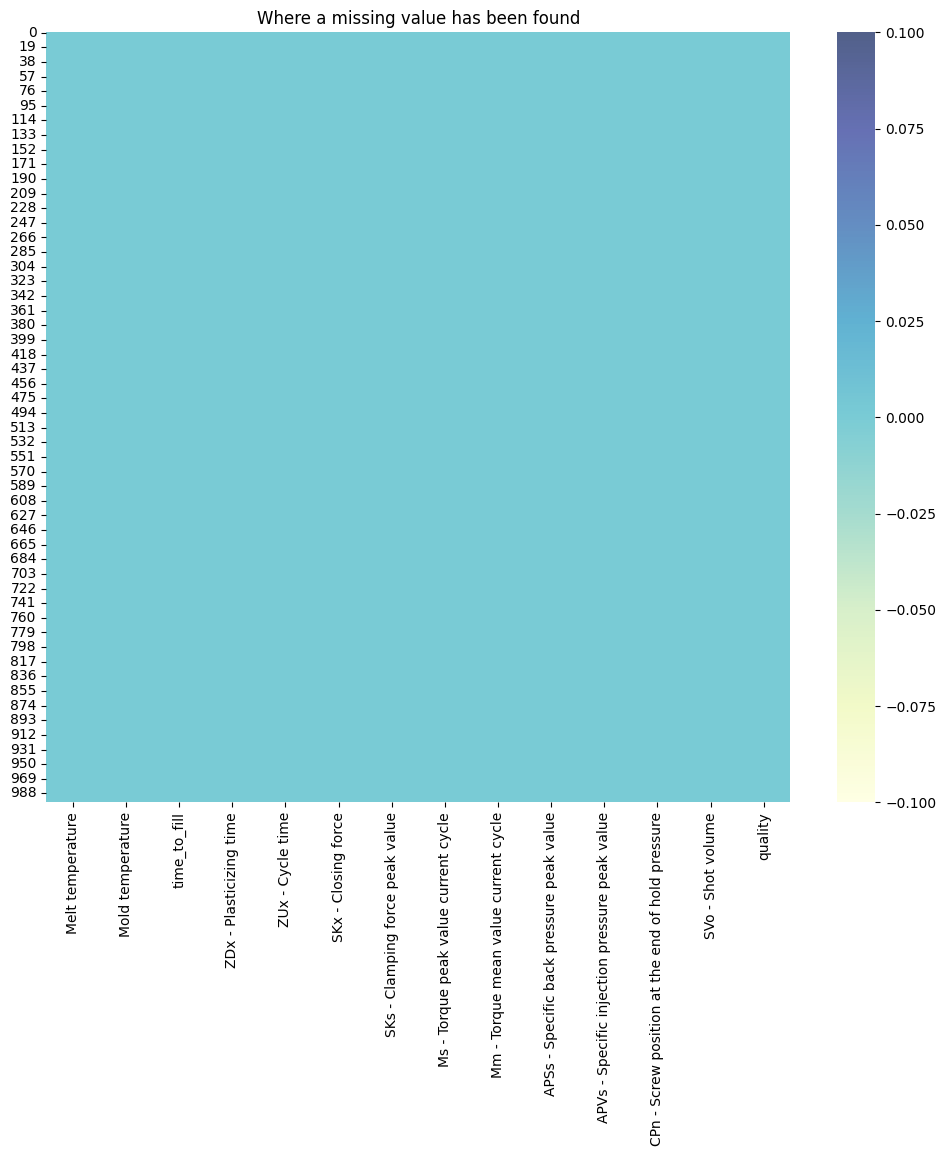

In [ ]:

plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.isna(), cmap='YlGnBu', alpha=0.7)
plt.title('Where a missing value has been found')
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

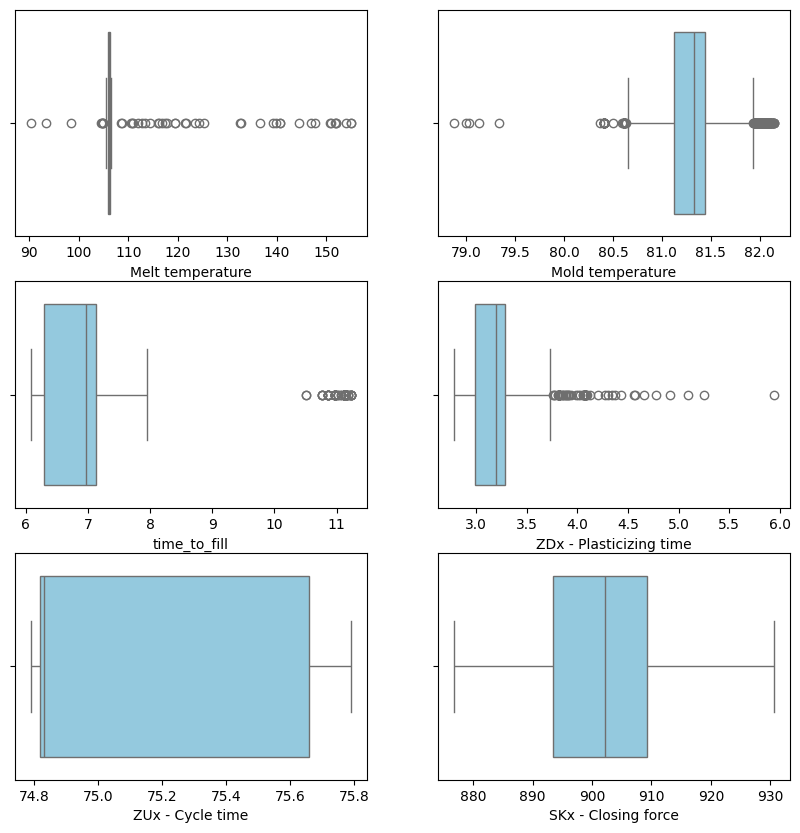

In [ ]:
# Using box plox to determine outliers in numerical columns
numeric_columns = df.select_dtypes(include="number").columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()
color = 'skyblue'
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color=color)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

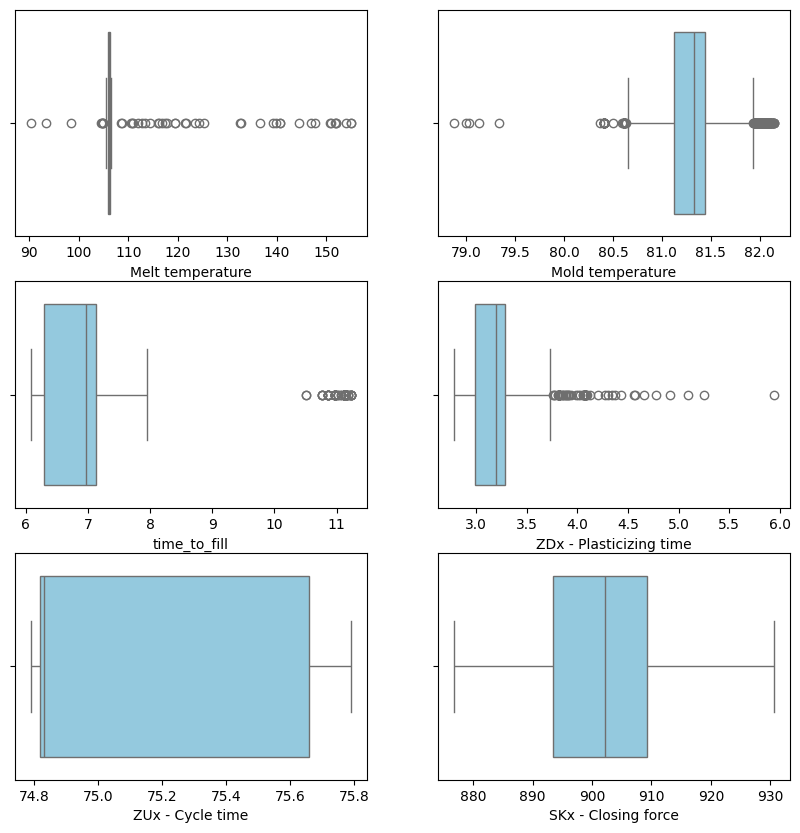

In [ ]:


# Assuming df is your DataFrame
# Exclude the ID column from numerical_columns
numeric_columns = df.select_dtypes(include="number").columns.drop('ID')

# Create the box plots without the ID column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()
color = 'skyblue'
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color=color)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [ ]:
# Create bar chart for each categorical column
fig = plt.figure(figsize=(15, 30))

# Selecting only categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Get the number of columns to plot (excluding excluded columns)
columns_to_plot = [column for column in categorical_columns]
num_columns = len(columns_to_plot)

# Define subplot grid size based on the number of columns
rows = (num_columns // 3) + (1 if num_columns % 3 > 0 else 0)

for i, column in enumerate(columns_to_plot):
    sub = fig.add_subplot(rows, 3, i + 1)
    chart = sns.histplot(data=df, x=column, bins=10, color='b', kde=True)
    chart.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Assuming df is your DataFrame with numerical attributes
numeric_df = df.select_dtypes(include='number')  # Select only numerical columns

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print or display the correlation matrix
correlation_matrix

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
Melt temperature,1.000000,0.209772,0.281347,-0.140173,0.081232,0.048912,0.028248,-0.004935,0.040333,-0.015069,-0.014333,0.102619,-0.100875,0.148178
Mold temperature,0.209772,1.000000,0.720831,-0.503363,0.376670,-0.014685,-0.051749,-0.000052,0.126112,-0.200259,-0.012466,0.402134,-0.380975,0.549870
time_to_fill,0.281347,0.720831,1.000000,-0.406442,0.238996,0.043207,-0.021659,-0.038388,0.003896,-0.134345,-0.082490,0.254316,-0.250423,0.434192
ZDx - Plasticizing time,-0.140173,-0.503363,-0.406442,1.000000,-0.089448,-0.134796,-0.038695,-0.407426,-0.538041,0.213577,-0.398678,-0.665101,0.690364,-0.345757
ZUx - Cycle time,0.081232,0.376670,0.238996,-0.089448,1.000000,-0.324589,-0.223069,-0.135189,-0.035636,-0.114792,-0.599343,-0.040907,0.059652,0.860981
SKx - Closing force,0.048912,-0.014685,0.043207,-0.134796,-0.324589,1.000000,0.652868,0.057926,0.043072,-0.064499,0.186118,0.227727,-0.215546,-0.076060
SKs - Clamping force peak value,0.028248,-0.051749,-0.021659,-0.038695,-0.223069,0.652868,1.000000,-0.009374,0.083363,-0.057047,0.027866,0.138277,-0.084901,-0.025683
Ms - Torque peak value current cycle,-0.004935,-0.000052,-0.038388,-0.407426,-0.135189,0.057926,-0.009374,1.000000,0.447246,-0.074985,0.415813,0.374092,-0.378510,-0.075364
Mm - Torque mean value current cycle,0.040333,0.126112,0.003896,-0.538041,-0.035636,0.043072,0.083363,0.447246,1.000000,-0.084576,0.420401,0.520301,-0.478274,0.064316
APSs - Specific back pressure peak value,-0.015069,-0.200259,-0.134345,0.213577,-0.114792,-0.064499,-0.057047,-0.074985,-0.084576,1.000000,-0.053361,-0.243498,0.226357,-0.227658


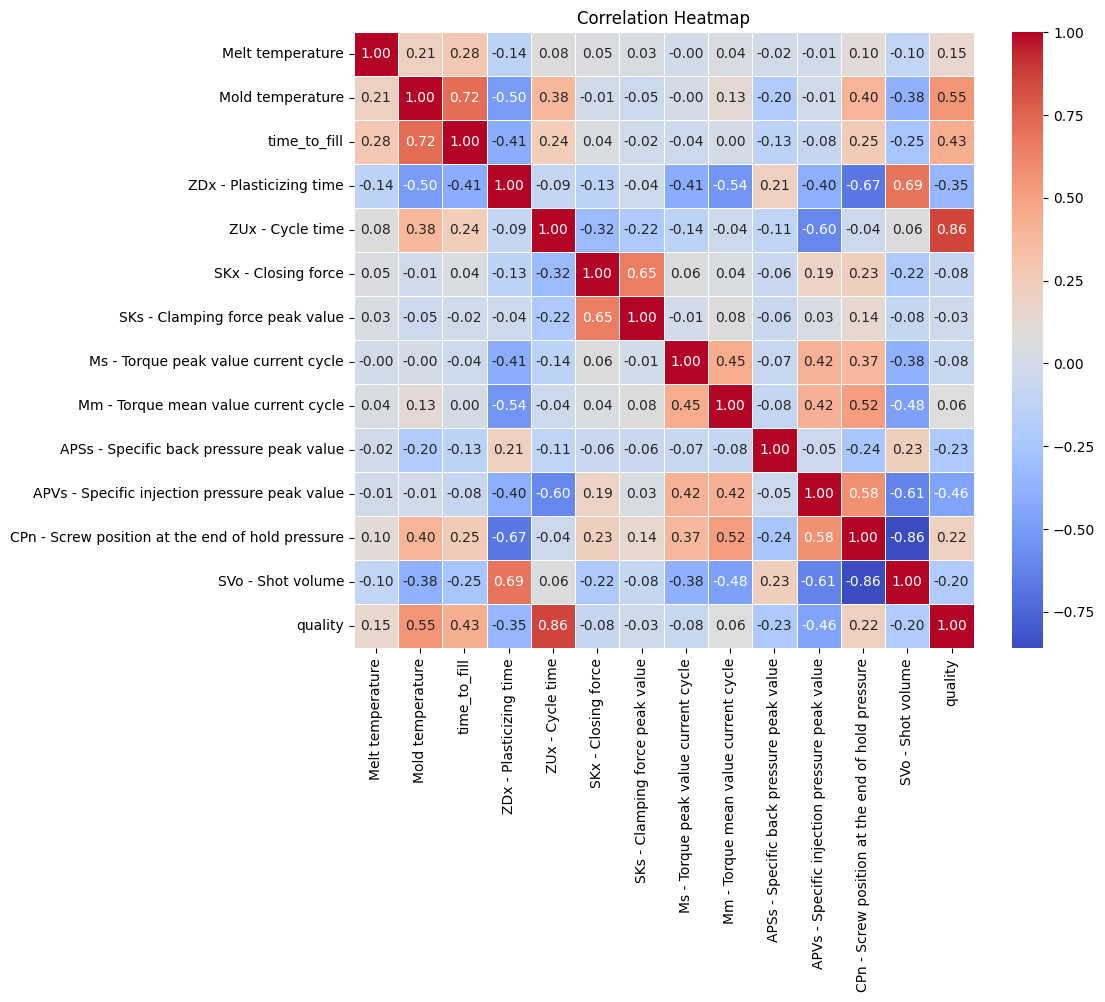

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

**DATA PREPROCESSING**

In [ ]:
df.drop(['ID'], axis=1, inplace=True)
df.shape

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include='object').columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_mode.fit_transform(df[categorical_columns])

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
imputer_mean = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer_mean.fit_transform(df[numerical_columns])

# Now your DataFrame df has missing values in categorical columns imputed with mode
# and missing values in numerical columns imputed with mean


In [ ]:
missing_values_count = df.isnull().sum().sort_values(ascending=False)
missing_values_count

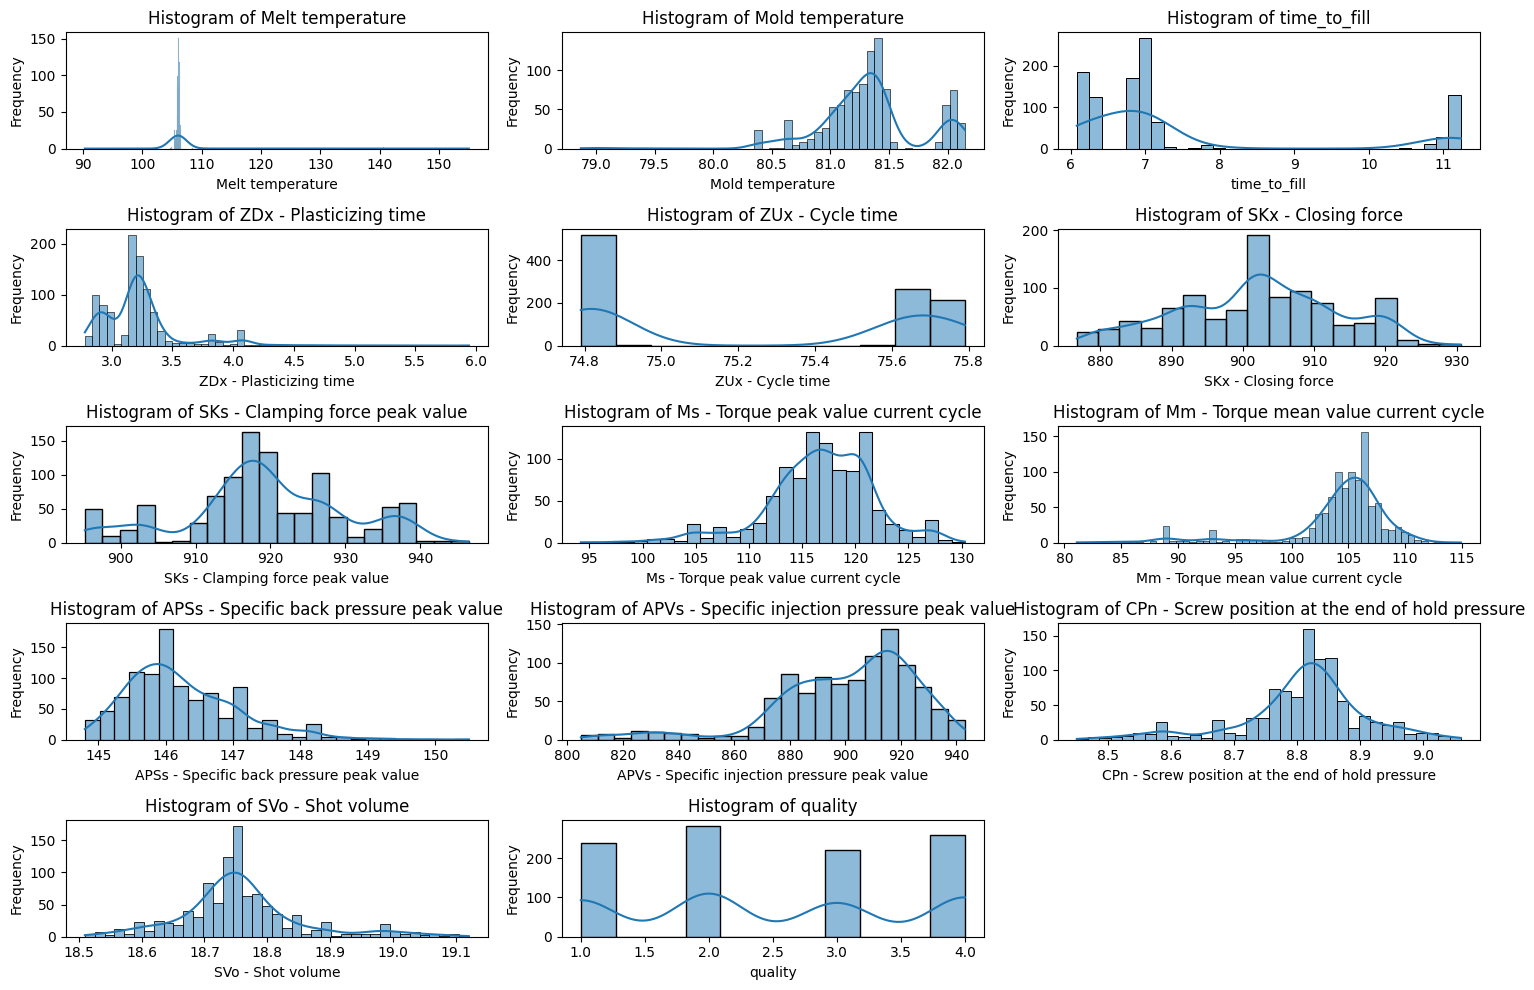

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns for plotting
numerical_columns = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]

# Determine the number of rows and columns for subplots
num_rows = (len(numerical_columns) + 2) // 3  # Adding 2 and dividing by 3 for a 3x3 grid
num_cols = min(len(numerical_columns), 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])  # Plot histogram with KDE
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if any
for j in range(len(numerical_columns), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



In [ ]:
# Define the names of categorical columns
categorical_columns = ['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering', 'Platform_location',
                       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 'Onlinebooking_Ease',
                       'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness',
                       'Online_boarding', 'Gender', 'CustomerType', 'TypeTravel', 'Travel_Class']

# Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
df_encoded.head()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire DataFrame
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_encoded_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_encoded_scaled

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,-0.183924,-0.383691,-0.345351,-0.214353,-0.926314,-1.479464,-0.103797,-1.925823,0.010909,0.939173,0.924854,0.210472,-0.482160,-1.343081
1,-0.124468,0.180084,-0.345351,-0.109807,-0.972354,1.619573,-2.238192,-0.583233,0.488797,-0.279582,0.778787,0.414615,-0.274198,-1.343081
2,-0.182504,-0.214559,-0.713726,0.526383,1.122492,-1.024391,-0.924001,-0.644260,-0.314164,-0.888960,-0.551609,-0.401958,0.453670,0.450085
3,-0.124468,-0.700815,-0.345351,-0.135755,-0.926314,-2.022981,-1.427308,0.759356,0.484412,-0.401458,1.288048,0.312543,0.037745,-1.343081
4,-0.143459,0.393849,-0.744424,-1.140274,0.961350,0.355198,0.175818,-0.461180,0.314311,-1.376462,0.170831,1.741545,-1.729934,1.346668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.147896,1.563682,2.171875,-1.016818,0.869269,-0.023513,-0.187681,0.698330,0.292640,-0.888960,-0.326586,0.720829,-0.690123,1.346668
996,-0.124646,0.008602,-0.283955,-0.121761,-0.949334,0.688824,0.763010,-0.400153,0.314311,0.573546,0.506391,-0.095743,0.037745,-0.446498
997,-0.142749,0.032093,-0.283955,0.063423,-0.926314,0.860145,0.567279,-1.437608,-0.444193,1.914177,0.593242,0.414615,-0.482160,-0.446498
998,-0.082081,0.180084,-0.345351,-0.139685,-0.949334,-1.500226,0.054652,0.759356,0.769414,2.279803,-1.021393,0.312543,-0.274198,-1.343081


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Standardize the encoded data using StandardScaler (assuming numerical columns are already standardized)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Overall_Experience', axis=1))

# Create a DataFrame with standardized features
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns[1:])

# Concatenate the standardized features with the target column 'Overall_Experience'
df_scaled = pd.concat([df_encoded['Overall_Experience'], df_scaled], axis=1)

# Calculate the correlation matrix
corr_matrix = df_scaled.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
# Plot the correlation matrix heatmap with adjusted size and annotations
plt.figure(figsize=(14, 12))  # Increase the figure size
heatmap = sns.heatmap(corr_matrix[['Overall_Experience']].sort_values(by='Overall_Experience', ascending=False),
                      annot=True,
                      fmt=".2f",  # Format annotations to two decimal places
                      cmap='Spectral',
                      linewidths=0.5)
plt.title('Correlation Matrix of Attributes with Overall Experience', fontsize=16)  # Increase title font size
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

df = df_scaled

In [ ]:
print("\nCorrelation coefficients:")
corr_matrix['Overall_Experience'].sort_values(ascending=True)
corr_matrix.T

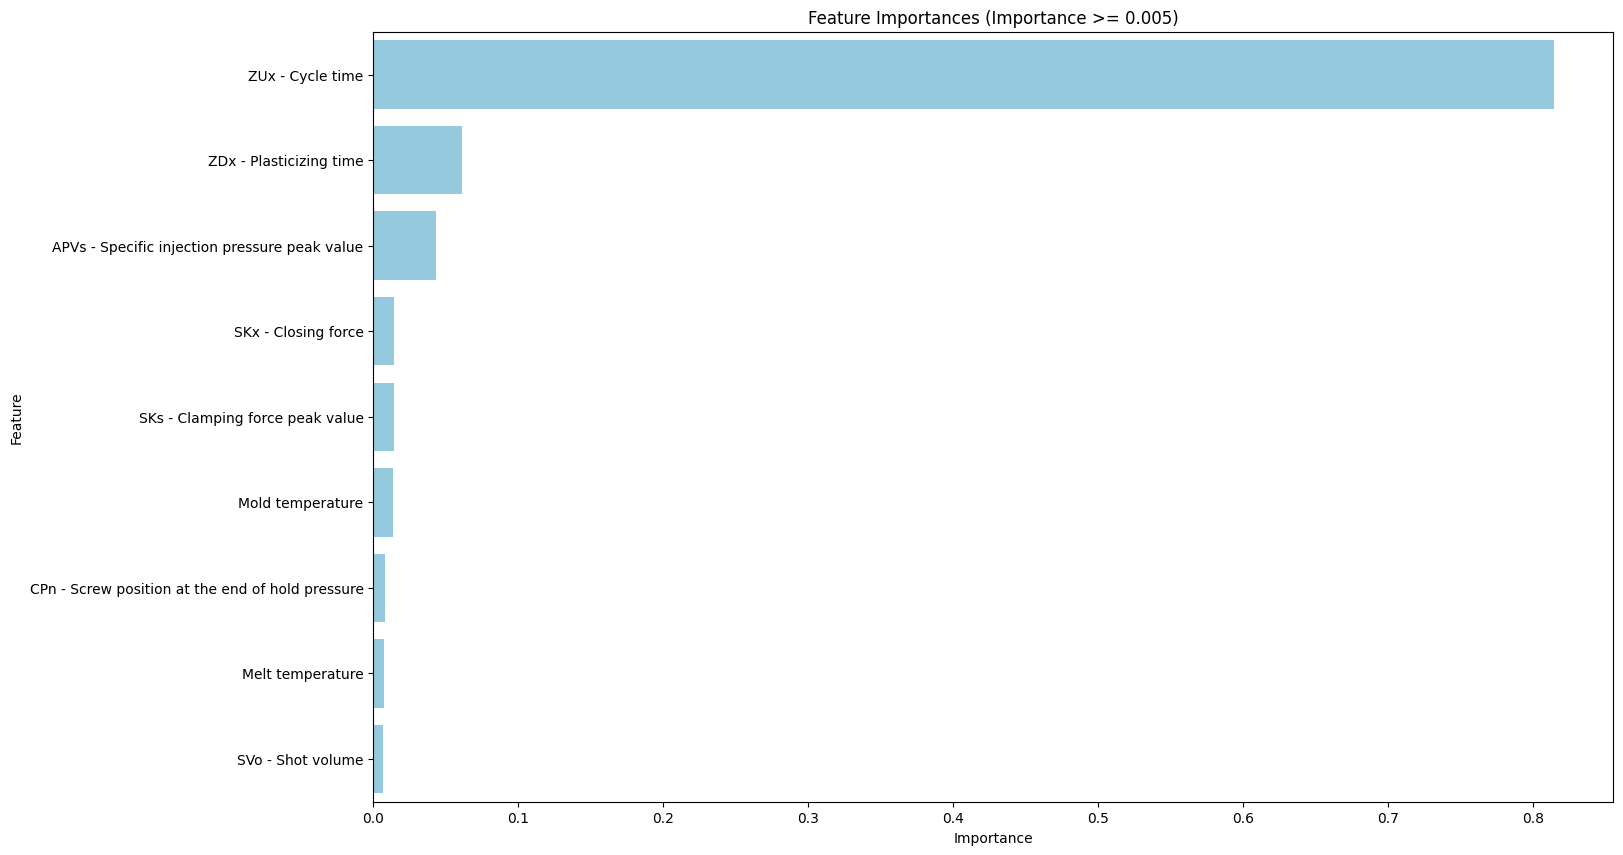

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset and preprocess it
# Assuming 'df' is your DataFrame with features and target variable
# Replace 'target_column_name' with the name of your target column
target_column_name = 'quality'
# For example:
# df = pd.read_csv('your_dataset.csv')

# Assuming df contains only numerical columns (you may need preprocessing for categorical columns)

# Split the data into features (X) and target variable (y)
X = df_encoded_scaled.drop(target_column_name, axis=1)
y = df_encoded_scaled[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Filter features with importance >= 0.02
selected_features_df = feature_importance_df[feature_importance_df['Importance'] >= 0.005]

# Sort the selected features by importance (descending order)
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Plotting selected feature importances
plt.figure(figsize=(16, 10))
sns.barplot(x='Importance', y='Feature', data=selected_features_df, color='skyblue')
plt.title('Feature Importances (Importance >= 0.005)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

target_column_name = 'quality'

# Spliting the data into features (X) and target variable (y)
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Spliting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (700, 13), y_train shape: (700,)
X_test shape: (300, 13), y_test shape: (300,)


BEFORE TUNING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# Define models with default hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Artificial Neural Network": MLPClassifier(max_iter=1000)
}

# Perform k-fold cross-validation and evaluate models
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_before_tuning = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else None

    # Store results
    results_before_tuning[model_name] = {
        # "CV Accuracy": np.mean(cv_scores),
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }



# Convert results to a DataFrame for better visualization
results_before_tuning_df = pd.DataFrame(results_before_tuning).T
results_before_tuning_df.sort_values(by="Test Accuracy", ascending=False)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Evaluating Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Artificial Neural Network...


,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.923333,0.923942,0.923333,0.922903,0.982105
Decision Tree,0.910000,0.910875,0.910000,0.909352,0.938784
Logistic Regression,0.756667,0.753311,0.756667,0.753899,0.902458
Artificial Neural Network,0.403333,0.459624,0.403333,0.409383,0.668367
Support Vector Machine,0.273333,0.074711,0.273333,0.117347,0.822786


CHAT GPT

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score



# Define models with hyperparameter tuning using GridSearchCV
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {'C': [0.01, 0.1, 1, 10]}),
    "Support Vector Machine": (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}),
    "Artificial Neural Network": (MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50,50)],
                                                                  'activation': ['relu', 'tanh'],
                                                                  'alpha': [0.0001, 0.001]})
}

# Perform k-fold cross-validation and GridSearchCV for model tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df.sort_values(by="Accuracy", ascending=False)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Best Params,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.933333,0.933919,0.933333,0.933044,0.981313
Decision Tree,"{'criterion': 'gini', 'max_depth': 3}",0.916667,0.919578,0.916667,0.915932,0.96624
Support Vector Machine,"{'C': 0.1, 'kernel': 'linear'}",0.84,0.840976,0.84,0.838863,0.939914
Logistic Regression,{'C': 0.1},0.773333,0.771437,0.773333,0.771668,0.906322
Artificial Neural Network,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.466667,0.425295,0.466667,0.373829,0.736644


ACTUAL TESTING AFTER TRAINING

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Initialize a dictionary to store the results
final_results = {}

for model_name, model in best_models.items():
    # Predictions for training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')

    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    # Handle multi-class ROC-AUC
    if hasattr(model, "predict_proba"):
        train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
        test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        train_roc_auc = None
        test_roc_auc = None

    # Store results
    final_results[model_name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1-Score": train_f1,
        "Test F1-Score": test_f1,
        "Train ROC-AUC": train_roc_auc,
        "Test ROC-AUC": test_roc_auc,
    }

# Convert results to a DataFrame for better visualization
final_results_df = pd.DataFrame(final_results).T
final_results_df.sort_values(by="Test Accuracy", ascending=False)



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train ROC-AUC,Test ROC-AUC
Random Forest,1.000000,0.926667,1.000000,0.927115,1.000000,0.926667,1.000000,0.926313,1.000000,0.978103
Decision Tree,0.935714,0.923333,0.937237,0.925605,0.935714,0.923333,0.935776,0.922696,0.984023,0.973235
Support Vector Machine,0.880000,0.840000,0.880805,0.840976,0.880000,0.840000,0.879011,0.838863,0.968296,0.939679
Logistic Regression,0.822857,0.773333,0.820668,0.771437,0.822857,0.773333,0.819504,0.771668,0.943627,0.906322
Artificial Neural Network,0.334286,0.303333,0.193535,0.148655,0.334286,0.303333,0.220647,0.176668,0.591790,0.559234


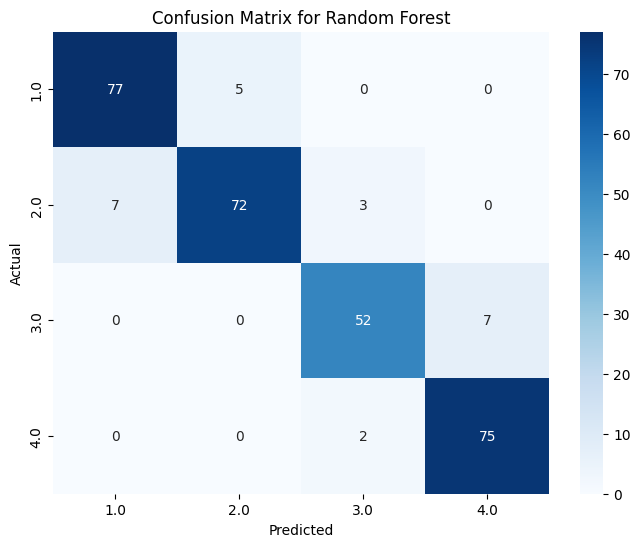

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()


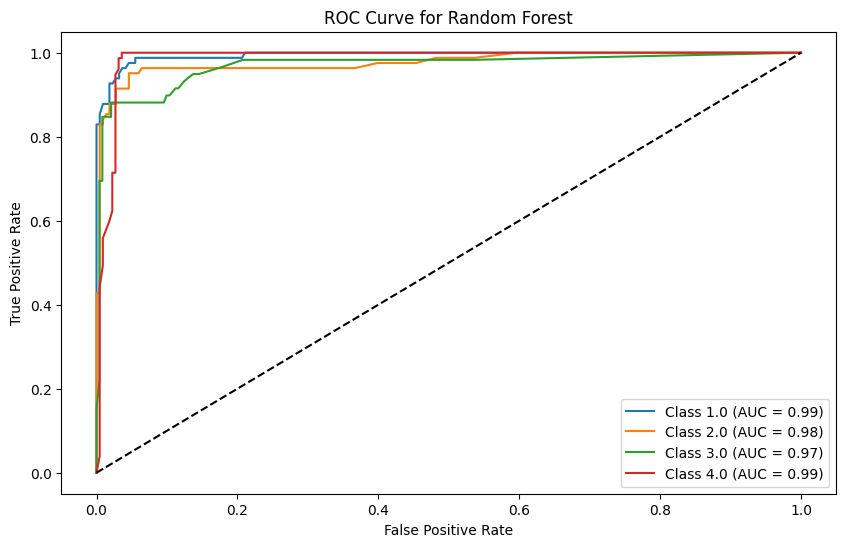

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)
y_pred_proba = best_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))

for i, class_label in enumerate(best_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for {best_model_name}")
plt.legend()
plt.show()


<ipython-input-31-8b159cbe47e9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x="Accuracy", y="Model", data=results_df, palette="viridis")
<ipython-input-31-8b159cbe47e9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(ax=axes[0, 1], x="Precision", y="Model", data=results_df, palette="magma")
<ipython-input-31-8b159cbe47e9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1, 0], x="Recall", y="Model", data=results_df, palette="coolwarm")
<ipython-input-31-8b159cbe47e9>:32: FutureWarning: 

Passing `palette`

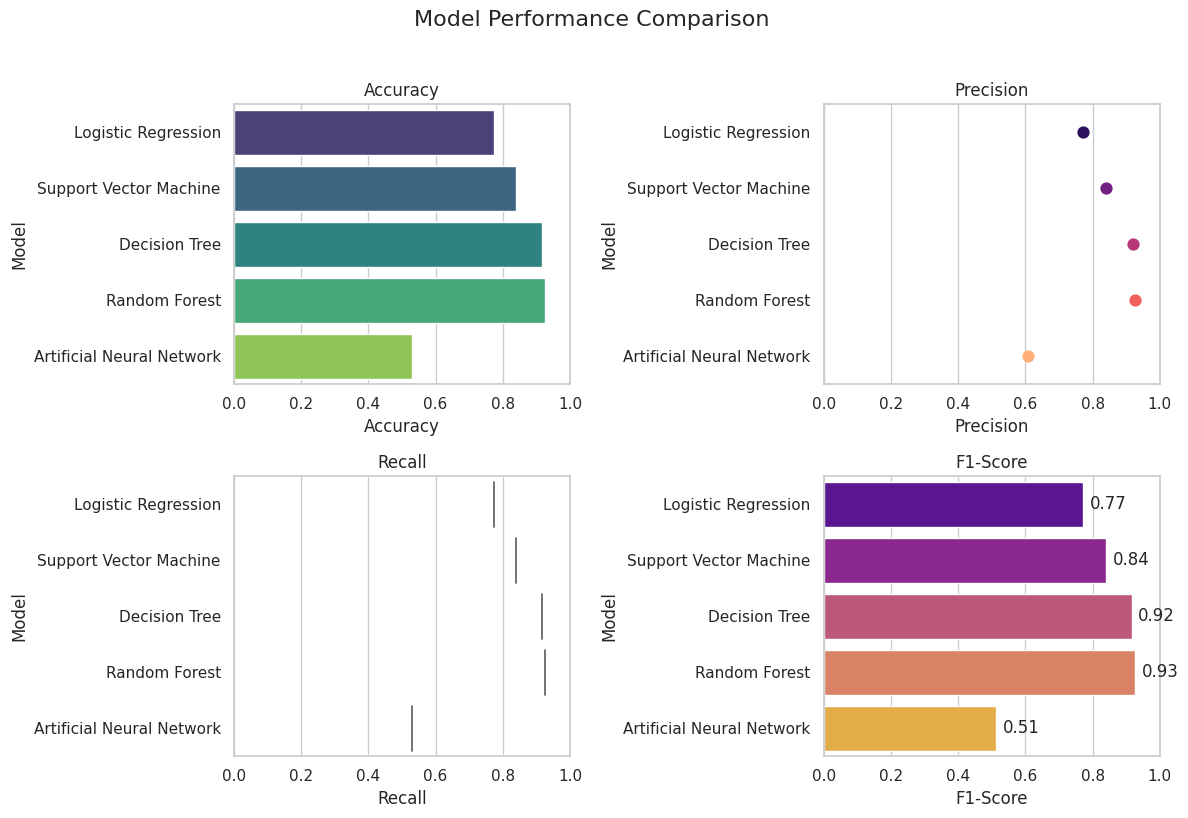

<ipython-input-31-8b159cbe47e9>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="rocket")


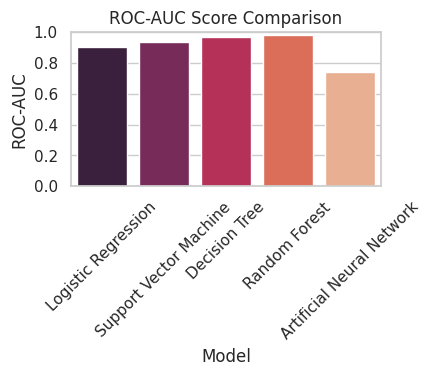

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid", palette="pastel")

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={"index": "Model"}, inplace=True)

# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Model Performance Comparison", fontsize=16, y=1.02)

# Plot 1: Accuracy (Horizontal Bar Chart)
sns.barplot(ax=axes[0, 0], x="Accuracy", y="Model", data=results_df, palette="viridis")
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_xlim(0, 1)

# Plot 2: Precision (Point Plot)
sns.pointplot(ax=axes[0, 1], x="Precision", y="Model", data=results_df, palette="magma")
axes[0, 1].set_title("Precision")
axes[0, 1].set_xlim(0, 1)

# Plot 3: Recall (Violin Plot)
sns.violinplot(ax=axes[1, 0], x="Recall", y="Model", data=results_df, palette="coolwarm")
axes[1, 0].set_title("Recall")
axes[1, 0].set_xlim(0, 1)

# Plot 4: F1-Score (Horizontal Bar Chart with Annotations)
sns.barplot(ax=axes[1, 1], x="F1-Score", y="Model", data=results_df, palette="plasma")
axes[1, 1].set_title("F1-Score")
axes[1, 1].set_xlim(0, 1)

# Add annotations for F1-Score
for p in axes[1, 1].patches:
    width = p.get_width()
    axes[1, 1].text(width + 0.02, p.get_y() + p.get_height() / 2, f"{width:.2f}", ha="left", va="center")

# Adjust layout and spacing
plt.tight_layout()
plt.show()

# Plot ROC-AUC separately (as it has a different scale)
plt.figure(figsize=(4, 2))
sns.barplot(x="Model", y="ROC-AUC", data=results_df, palette="rocket")
plt.title("ROC-AUC Score Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace with your dataset)
@st.cache_data
def load_data():
    # Replace this with your dataset loading logic
    # df = pd.read_csv("your_dataset.csv")
    return df

# Train the Random Forest model (replace with your trained model)
@st.cache_data
def train_model(df):
    X = df.drop("quality", axis=1)
    y = df["quality"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    return model, X_test, y_test, scaler

# Streamlit App
def main():
    st.title("Product Quality Prediction Dashboard")
    st.sidebar.header("User Input Parameters")

    # Load data and train model
    df = load_data()
    model, X_test, y_test, scaler = train_model(df)

    # User input for process parameters
    st.sidebar.subheader("Input Process Parameters")
    input_data = {}
    for feature in df.columns[:-1]:  # Exclude the target column
        input_data[feature] = st.sidebar.number_input(f"Enter {feature}", value=df[feature].mean())

    # Predict quality class
    if st.sidebar.button("Predict Quality"):
        input_df = pd.DataFrame([input_data])
        input_scaled = scaler.transform(input_df)
        prediction = model.predict(input_scaled)
        st.success(f"Predicted Quality Class: {prediction[0]}")

    # Display overall production quality
    st.subheader("Overall Production Quality")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    st.write(f"**Accuracy:** {accuracy:.2f}")
    st.write(f"**Precision:** {precision_score(y_test, y_pred, average='weighted'):.2f}")
    st.write(f"**Recall:** {recall_score(y_test, y_pred, average='weighted'):.2f}")
    st.write(f"**F1-Score:** {f1_score(y_test, y_pred, average='weighted'):.2f}")
    st.write(f"**ROC-AUC:** {roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'):.2f}")

    # Display product scrap rates
    st.subheader("Product Scrap Rates")
    scrap_rate = (y_test != y_pred).mean()
    st.write(f"**Scrap Rate:** {scrap_rate:.2%}")

    # Visualize feature importance
    st.subheader("Feature Importance")
    feature_importance = pd.DataFrame({
        "Feature": df.columns[:-1],
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    fig, ax = plt.subplots()
    sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis", ax=ax)
    st.pyplot(fig)

    # Confusion Matrix
    st.subheader("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

    # Class-wise evaluation metrics
    st.subheader("Class-wise Evaluation Metrics")
    class_report = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report).transpose()
    st.dataframe(class_report_df)

    # ANOVA Plot (Example using permutation importance)
    st.subheader("ANOVA Plot (Permutation Importance)")
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    perm_importance = pd.DataFrame({
        "Feature": df.columns[:-1],
        "Importance": result.importances_mean
    }).sort_values(by="Importance", ascending=False)
    fig, ax = plt.subplots()
    sns.barplot(x="Importance", y="Feature", data=perm_importance, palette="coolwarm", ax=ax)
    st.pyplot(fig)

# Run the app
if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'